# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


In [14]:
cities

['westport',
 'mejit',
 'whitehorse',
 'puerto natales',
 'toledo',
 'ahau',
 'hermanus',
 'puerto san carlos',
 'piti village',
 'fada',
 'bilibino',
 'edinburgh of the seven seas',
 "st. john's",
 'grytviken',
 'slave lake',
 'taiohae',
 'loreto',
 'iqaluit',
 'port-aux-francais',
 'larache',
 'bengkulu',
 'bredasdorp',
 'tommot',
 'tubarjal',
 'adamstown',
 'margaret river',
 'yuzhno-kurilsk',
 'placido de castro',
 'kodiak',
 'waitangi',
 'madang',
 'albany',
 'constantia',
 "saint david's",
 'nepanagar',
 'ghat',
 'bubaque',
 'ust-nera',
 'qaqortoq',
 'tura',
 'east london',
 'sur',
 'avarua',
 'kuanda',
 'arraial do cabo',
 'anahuac',
 'yellowknife',
 'opuwo',
 'college',
 'cabedelo',
 'ushuaia',
 'jamestown',
 'mananjary',
 'alofi',
 "nikol'sk",
 'kingston',
 'ribeira grande',
 'makhambet',
 'doganyol',
 'port blair',
 'thompson',
 'hasaki',
 'sarankhola',
 'al jawf',
 'ciudad insurgentes',
 'cargados carajos',
 'glendive',
 'enriquillo',
 'olonkinbyen',
 'mandalgovi',
 'afaahit

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [58]:
requests.get("https://api.openweathermap.org/data/2.5/weather?q=College Station&units=imperial&appid=" + weather_api_key).json()

{'coord': {'lon': -96.3344, 'lat': 30.628},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 48.99,
  'feels_like': 46.6,
  'temp_min': 42.6,
  'temp_max': 52.05,
  'pressure': 1025,
  'humidity': 64},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 170},
 'clouds': {'all': 0},
 'dt': 1701927725,
 'sys': {'type': 2,
  'id': 2082309,
  'country': 'US',
  'sunrise': 1701868135,
  'sunset': 1701905042},
 'timezone': -21600,
 'id': 4682464,
 'name': 'College Station',
 'cod': 200}

In [59]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (base_url + "q=" + city + "&units=metric" + "&appid=" + weather_api_key)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | westport
Processing Record 2 of Set 1 | mejit
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | toledo
Processing Record 6 of Set 1 | ahau
City not found. Skipping...
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 9 of Set 1 | piti village
Processing Record 10 of Set 1 | fada
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | st. john's
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | slave lake
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | loreto
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | larache
Processin

In [60]:
pd.DataFrame(city_data)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,westport,41.1415,-73.3579,1.02,72,0,2.06,US,1701927765
1,mejit,10.2753,170.8646,27.56,83,76,10.92,MH,1701927766
2,whitehorse,60.7161,-135.0538,-1.57,80,100,6.69,CA,1701927767
3,puerto natales,-51.7236,-72.4875,3.64,94,2,2.02,CL,1701927768
4,toledo,39.8333,-4.0000,6.84,81,99,1.60,ES,1701927769
...,...,...,...,...,...,...,...,...,...
569,buenaventura,3.8801,-77.0312,23.86,96,100,1.15,CO,1701928389
570,lityn,49.3251,28.0809,-5.02,90,100,4.10,UA,1701928390
571,la ronge,55.1001,-105.2842,0.14,74,75,2.57,CA,1701928392
572,hobyo,5.3505,48.5268,27.42,56,94,9.34,SO,1701928393


In [61]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [62]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,westport,41.1415,-73.3579,1.02,72,0,2.06,US,1701927765
1,mejit,10.2753,170.8646,27.56,83,76,10.92,MH,1701927766
2,whitehorse,60.7161,-135.0538,-1.57,80,100,6.69,CA,1701927767
3,puerto natales,-51.7236,-72.4875,3.64,94,2,2.02,CL,1701927768
4,toledo,39.8333,-4.0000,6.84,81,99,1.60,ES,1701927769


In [63]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,westport,41.1415,-73.3579,1.02,72,0,2.06,US,1701927765
1,mejit,10.2753,170.8646,27.56,83,76,10.92,MH,1701927766
2,whitehorse,60.7161,-135.0538,-1.57,80,100,6.69,CA,1701927767
3,puerto natales,-51.7236,-72.4875,3.64,94,2,2.02,CL,1701927768
4,toledo,39.8333,-4.0000,6.84,81,99,1.60,ES,1701927769


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

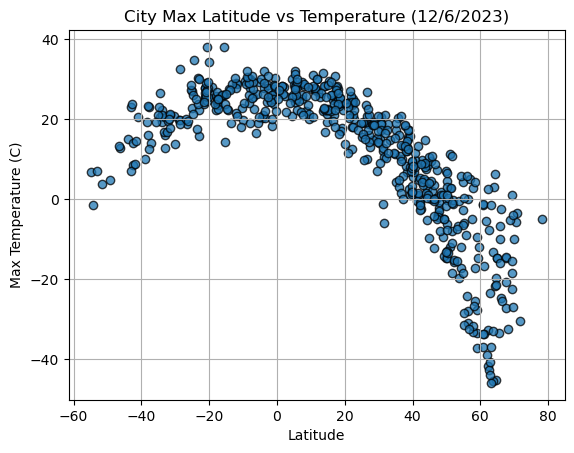

In [4]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature (12/6/2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

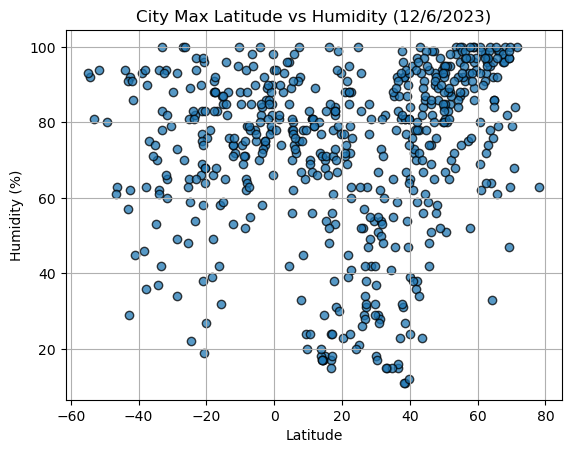

In [5]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs Humidity (12/6/2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

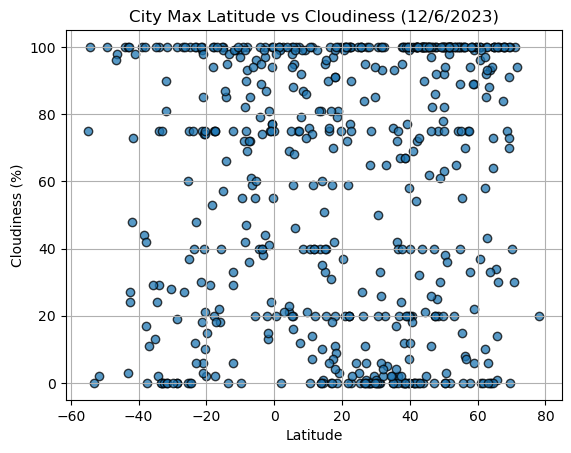

In [6]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs Cloudiness (12/6/2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

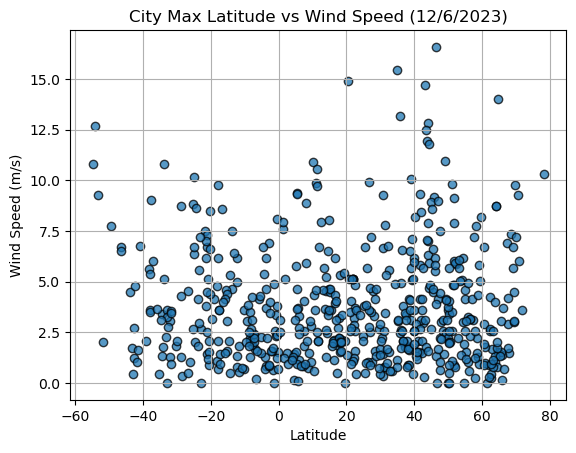

In [7]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs Wind Speed (12/6/2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots
def regressplot(df, x_cols, y_cols):

    # get x values and y values from columns
    x_vals = df[x_cols[0]]
    y_vals = df[y_cols[0]]

    # get linear regression variables using linregress function
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)

    # define regression values and calculate
    regress_values = x_vals * slope + intercept

    # define line equation and build string with necessary regression values
    line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

    # print the results
    print(f"The r-value is: {rvalue}")

    # plot the line
    plt.scatter(x_vals, y_vals)
    plt.plot(x_vals, regress_values, "r-")
    plt.xlabel(str(x_cols))
    plt.ylabel(str(y_cols))
    plt.title(f"{x_cols} vs. {y_cols}")
    plt.show()

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,westport,41.1415,-73.3579,1.02,72,0,2.06,US,1701927765
1,mejit,10.2753,170.8646,27.56,83,76,10.92,MH,1701927766
2,whitehorse,60.7161,-135.0538,-1.57,80,100,6.69,CA,1701927767
4,toledo,39.8333,-4.0000,6.84,81,99,1.60,ES,1701927769
6,piti village,13.4626,144.6933,31.49,72,40,5.66,GU,1701927773


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,3.64,94,2,2.02,CL,1701927768
5,hermanus,-34.4187,19.2345,26.45,37,2,1.33,ZA,1701927771
9,edinburgh of the seven seas,-37.0676,-12.3116,13.99,75,11,6.04,SH,1701927776
11,grytviken,-54.2811,-36.5092,-1.53,92,100,12.67,GS,1701927778
15,port-aux-francais,-49.3500,70.2167,4.72,80,100,7.72,TF,1701927782


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8660329083413649


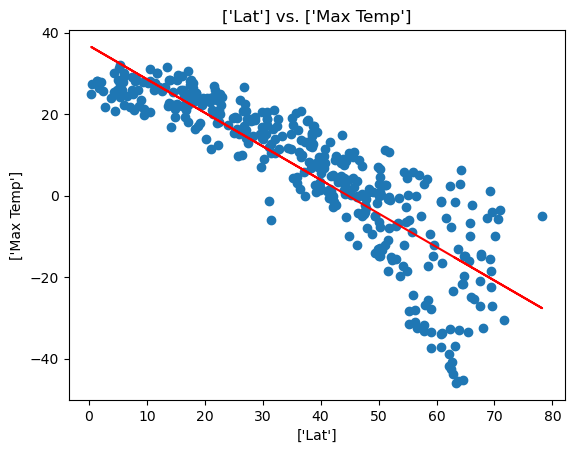

In [88]:
# Linear regression on Northern Hemisphere
regressplot(northern_hemi_df, ["Lat"], ["Max Temp"])

The r-value is: 0.6303180483848013


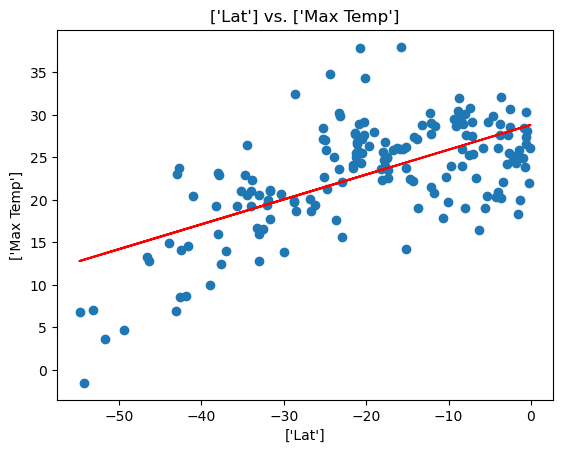

In [78]:
# Linear regression on Southern Hemisphere
regressplot(southern_hemi_df, ["Lat"], ["Max Temp"])

**Discussion about the linear relationship: 

    - There is definitely a correlation between latitude and max temperature in both the northern and southern hemispheres. However, the relationship is more pronounced in the northern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3434144532317485


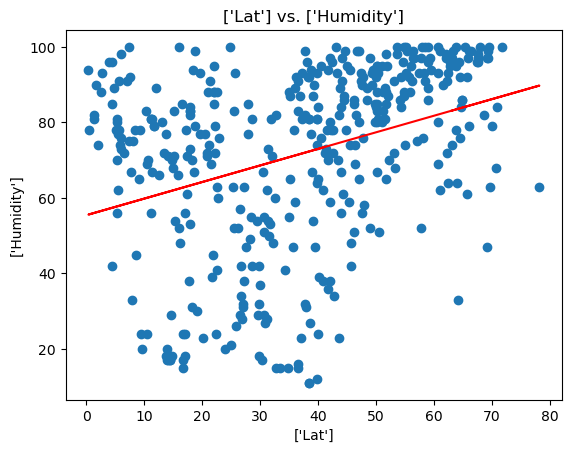

In [79]:
# Northern Hemisphere
regressplot(northern_hemi_df, ["Lat"], ["Humidity"])

The r-value is: 0.13366665384904072


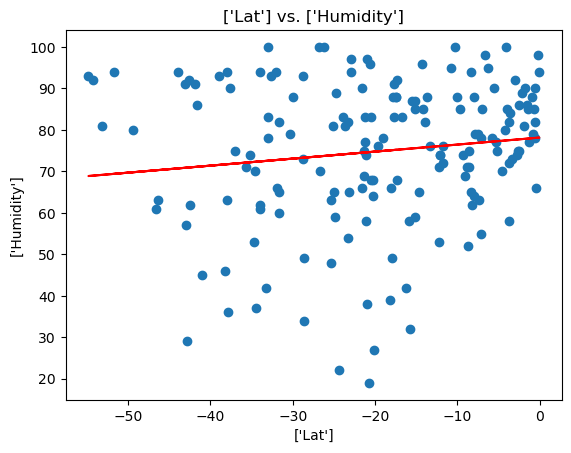

In [80]:
# Southern Hemisphere
regressplot(southern_hemi_df, ["Lat"], ["Humidity"])

**Discussion about the linear relationship: There is a marginally postive correlation between latitude and humidity in the northern hemisphere (rvalue:0.3434144532317485). There is only a very slight positive correlation in the southern hemisphere (rvalue:0.13366665384904072). 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11583016625409412


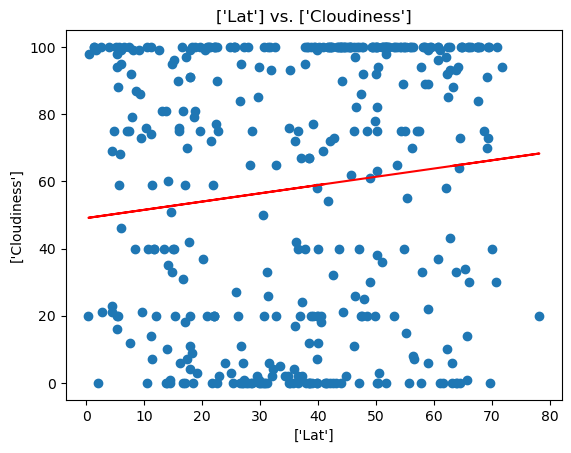

In [81]:
# Northern Hemisphere
regressplot(northern_hemi_df, ["Lat"], ["Cloudiness"])

The r-value is: 0.17821419501326877


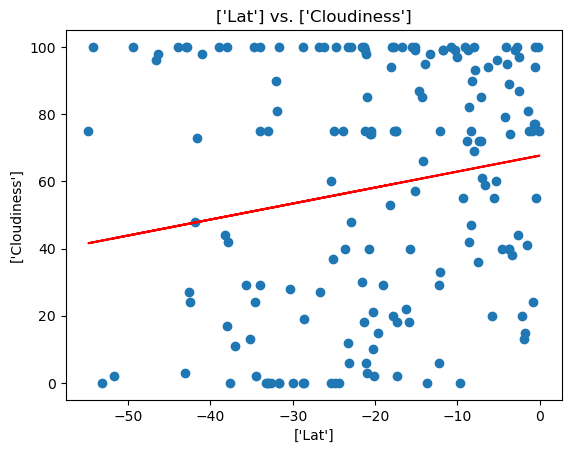

In [82]:
# Southern Hemisphere
regressplot(southern_hemi_df, ["Lat"], ["Cloudiness"])

**Discussion about the linear relationship: There is not a strong correlation between latitude and cloudiness in either hemisphere, but the relationship is slightly stronger in the northern hemisphere than in the southern.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.042882226493086505


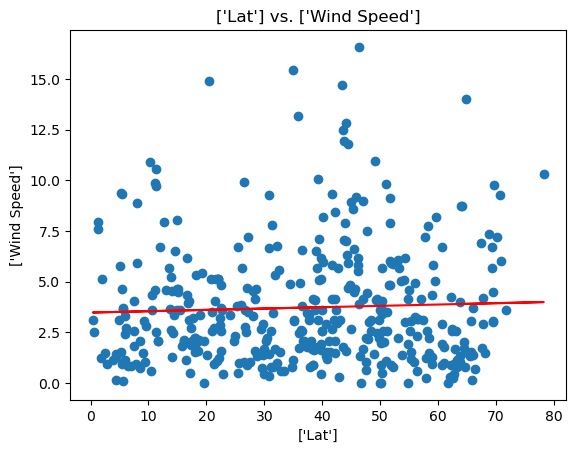

In [83]:
# Northern Hemisphere
regressplot(northern_hemi_df, ["Lat"], ["Wind Speed"])

The r-value is: -0.28050489658531746


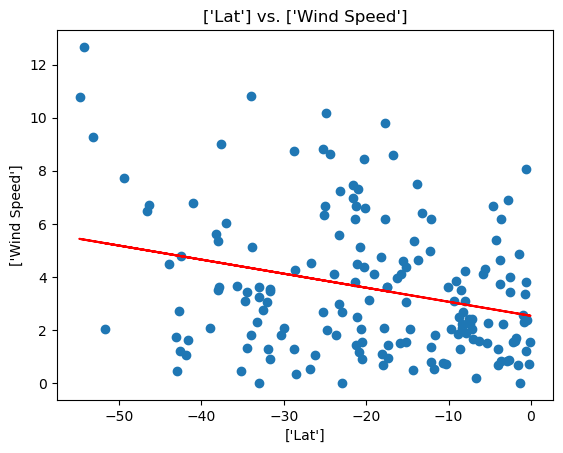

In [84]:
# Southern Hemisphere
regressplot(southern_hemi_df, ["Lat"], ["Wind Speed"])

**Discussion about the linear relationship: There is hardly any correlation at all between latitude and wind speed in the northern hemisphere (r-value: 0.042882226493086505). The relationship is stronger in the southern hemisphere, though still not very strong overall (r-value: -0.28050489658531746)